В этом задании мы будем решать задачу многоклассовой классификации сначала на сгенерированных данных, а затем на датасете Digits. Вы реализуете функции активации и архитектуру нейросети, а затем примените это на датасете.

Изученные ранее классы и функции, которые нам понадобятся.

In [1]:
import numpy as np

In [2]:
class LinearLayer:
    def __init__(self, input_size, output_size, activation_function, activation_function_derivative):
        
        self.input_size = input_size
        self.output_size = output_size
        
        self.W = np.random.random_sample((output_size, input_size)) * 2 - 1
        self.b = np.random.random_sample((output_size,)) * 2 - 1
            
        self.grad_W = np.zeros((output_size, input_size))
        self.grad_b = np.zeros((output_size,))
        
        self.activation_function = activation_function
        self.activation_function_derivative = activation_function_derivative
        
    def forward(self, x):
        z = self.W @ x + self.b # z^(l+1) = W^(l)*h^(l) + b^(l)
        h = self.activation_function(z) # h^(l) = f(z^(l))
        return h, z
    
    def backward(self, delta_next, z, w_next):
        return w_next.T @ delta_next * self.activation_function_derivative(z)

    def backward_as_last_layer(self, loss_der, z):
        return self.activation_function_derivative(z) * loss_der
    
    def clear_grad(self):
        self.grad_W = np.zeros((self.output_size, self.input_size))
        self.grad_b = np.zeros((self.output_size,))


In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

Импортируем основные библиотеки:



In [4]:
import math
import numpy as np
import seaborn as sns

## SoftMax и Cross Entropy

### SoftMax и ее производная

Основной функцией активации, используемой в нашем случае, является SoftMax.

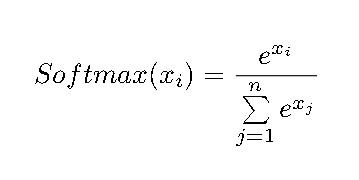

Реализуем ее. Будем возвращать сразу массив значений Softmax для вектора x.

Подсказка: очень хорошо для этого подойдёт функция np.exp().

In [5]:
def Softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

Также, нам понадобится производная SoftMax. Здесь мы применим один трюк — гораздо удобнее считать производные SoftMax и Cross Entropy совместно, как CE(softmax(x)). Поэтому обозначим производную за 1, чтобы не переписывать весь код нейронных сетей.

In [6]:
def Softmax_derivative(x):
    return 1

SoftMax должен сохранить относительные размеры элементов массива. То есть тот элемент, который до SoftMax был больше других, должен быть и после применения больше, а меньший элемент, соответственно, меньше.

In [7]:
test = np.array([0, 1, 10])
print(Softmax(test))

[4.53922671e-05 1.23388975e-04 9.99831219e-01]


In [8]:
print(Softmax_derivative(test))

1


### Cross Entropy Loss

Реализуем CE Loss:


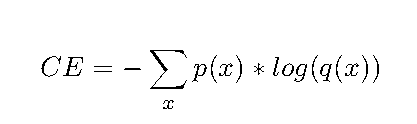

Для начала преобразуем наш target в так называемый one hot vector — 
он представляет собой вектор размера максимального количества классов, где 
каждое число отвечает за класс. То есть, например, для target=3 при общем количестве классов 5 one hot vector будет выглядеть как [0,0,0,1,0]

In [12]:
def targets_to_onehot(N_classes, targets):
    one_hot_matrix = np.zeros((len(targets), N_classes))
    for target_row, idx in zip(one_hot_matrix, targets):
        target_row[idx] = 1
    return one_hot_matrix
            
print(targets_to_onehot(5, [1,2,4,3,0]))

#[[0. 1. 0. 0. 0.]
# [0. 0. 1. 0. 0.]
# [0. 0. 0. 0. 1.]
# [0. 0. 0. 1. 0.]
# [1. 0. 0. 0. 0.]]

[[0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


Используем такой трюк: введем epsilon(eps) и с его помощью ограничим числа, чтобы не получить случайно 0 внутри логарифма, что приведет к Nan.

При этом выберем eps достаточно маленьким, чтобы не потерять точность.

Для ограничения чисел воспользуемся функцией np.clip(), её нужно задать верхнюю и нижние границы.

In [25]:
def CE_loss(predicts, targets):
    targets_one_hot = targets_to_onehot(len(predicts), targets)
    eps = 1e-12
    preds = np.clip(predicts, eps, 1-eps)
    return -np.sum(np.multiply(targets_one_hot, np.log(preds)))

Проверьте себя, должны получиться числа как в комментариях.

In [26]:
print(CE_loss([[1,2,3], [3,2,1], [0,1,0]], [0,1,2]))
# 9.21034037197685
print(CE_loss([[1,2,3], [3,2,1], [0,1,0]], [2,0,1]))
# 9.999778782803785e-13

27.631021115930547
2.9999336348411356e-12


###Производная CE с учетом SoftMax

Для начала нам нужно посчитать производную SoftMax.


Рассматривается два случая — производная от SM(x_i) по x_c, где c!=i и где c=i, то есть производная от SM(x_i) по x_i.

Первый случай — производная по x_c.

Ваша задача посчитать производную по x_c и выразить её через функцию SoftMax.

In [ ]:
def dSoftmax_dxc(x, c, i):
    # место для вашего кода

In [ ]:
x = [1,2,3,4,5]
print(dSoftmax_dxc(x, 1, 2))
#-0.0027289761087486435
print(dSoftmax_dxc(x, 2, 1))
#-0.0027289761087486435
print(dSoftmax_dxc(x, 3, 2))
#-0.020164557560185196
print(dSoftmax_dxc(x, 4, 3))
#-0.14899704702232458

Теперь посчитайте производную по x_i.

In [ ]:
def dSoftmax_dxi(x, i):
    # место для вашего кода

In [ ]:
x = [1,2,3,4,5]

print(dSoftmax_dxi(x, 0))
#0.01152036323593907
print(dSoftmax_dxi(x, 1))
#0.0306809865902676
print(dSoftmax_dxi(x, 2))
#0.0787104182695584
print(dSoftmax_dxi(x, 3))
#0.17930870685796874
print(dSoftmax_dxi(x, 4))
#0.23139268114398798

Теперь перейдем к производной от Cross Entropy.

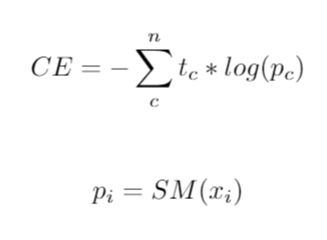

Производную кросс энтропии можно разделить на две части — та, в которой берется производная по совпадающему индексу i и сумма всех остальных, далее нужно подставить производные софтмакса, далее получится что-то вроде двух слагаемых, в одном из которых сумма по c!=i, в другом выражение с i-ым индексом

После можно заметить что часть из левого выражения можно внести под сумму и получить сумму уже по всем индексам без исключений. Также следует принять во внимание что t здесь — это тот самый one hot вектор, поэтому сумма по нему будет равна единице.

В итоге должно получиться очень простое выражение. Предлагаем вам самим проделать данный вывод и убедиться в том, насколько хорошо подходят Cross Entropy и Softmax друг другу.

In [ ]:
def CE_and_softmax_loss_derivative(predicts, targets):
    targets_one_hot = targets_to_onehot(len(predicts), targets)
    return # место для вашего кода

Давайте проверим себя, в комментарии указано то, что должно получиться.

In [ ]:
print(CE_and_softmax_loss_derivative([[0.1,0.2,0.7], [0.7,0.2,0.1], [0,1,0]], [0,1,2]))
"""
[[-0.9  0.2  0.7]
 [ 0.7 -0.8  0.1]
 [ 0.   1.  -1. ]]
"""
print(CE_and_softmax_loss_derivative([[0.1,0.2,0.7], [0.7,0.2,0.1], [0,1,0]], [2,0,1]))
"""
[[ 0.1  0.2 -0.3]
 [-0.3  0.2  0.1]
 [ 0.   0.   0. ]]
 """


## Сгенерированные данные

Итак, теперь мы готовы решать задачу многоклассовой классификации.

Сгенерируем данные, пусть это будут числа от 1 до 300, определим для них классы.

*   1-99 — класс 0
*   100-199 — класс 1
*   200-300 — класс 2

In [ ]:
new_data_x = np.random.randint(1, 300, 200)
print(new_data_x)
new_data_target = new_data_x // 100
print(new_data_target)

Здесь ничего для вас нового нет, кроме того, что для последнего слоя мы применяем SoftMax как функцию активации.

Вообще, Softmax не совсем корректно называть функцией активации, так как её значения зависят от выходов всех нейронов, а не одного, к которому она применяется, так что это скорее математический трюк.

## Нейронная сеть

Напишем класс нейросети.

In [ ]:
import tqdm


class MultiClassNN:
    def __init__(self, structure, loss, loss_derivative):
        self.structure = structure
        self.layers = []
        self.loss = loss
        self.loss_derivative = loss_derivative
        # место для вашего кода
        # заполните массив layers слоями с сигмоидой
        # а последнему слою вместо сигмоиды поставьте softmax
        
    def apply(self, x):
        # определите функцию apply
        # она должна возвращать значение на последнем слое
    
    def forward(self, x):
        h_array = [x]
        z_array = []
        for layer in self.layers:
            h, z = layer.forward(h_array[-1])
            h_array.append(h)
            z_array.append(z)        
        return h_array, z_array
    
    def clear_grad_values(self):
        # задайте функцию обнуления градиентов
    
    def train(self, X, y, iter_num = 500, alpha = 0.1):
        m = len(y)
        avg_cost_func = []
        for _ in tqdm.tqdm(range(iter_num)):    
            avg_cost = 0
            self.clear_grad_values()
            for i in range(len(y)):
                # one sample per time
                h, z = self.forward(X[i, :])             

                # backward pass
                grads = {}
                for layer_num, layer in reversed(list(enumerate(self.layers))):
                    if layer_num == len(self.layers) - 1:
                        # определите подсчет градиента для последнего слоя
                        # также посчитайте текущий лосс
                    else:
                        # определите расчет градиента для остальных слоёв
                    layer.grad_W += grads[layer_num][:,np.newaxis] @ np.transpose(h[layer_num][:,np.newaxis])
                    layer.grad_b += grads[layer_num]
                        
            
            for layer in self.layers:
                # обновление весов

            # вычисление среднего лосса
            avg_cost = avg_cost/ m
            avg_cost_func.append(avg_cost)
            
        return avg_cost_func

## Обучение нейросети

In [ ]:
N = MultiClassNN([1,2,3], CE_loss, CE_and_softmax_loss_derivative)

print(N.apply([150]))

avg_cost_func = N.train(new_data_x.reshape(-1, 1), new_data_target.reshape(-1, 1), 1500, 0.1)

sns.lineplot(data=avg_cost_func)
# get the prediction accuracy and print
predictions = [N.apply([10]), N.apply([260]),N.apply([140])]
print(predictions)

Ничего не получилось? Не удивляйтесь, дело в том, что у наших данных достаточно большой разброс и они принимают достаточно большие значения, которые после прохождения через сигмоиду все становятся близки к 1.

In [ ]:
print(sigmoid(1), sigmoid(5), sigmoid(10), sigmoid(99), sigmoid(199), sigmoid(299))

Давайте теперь нормализуем наши данные — значения x переведем в диапазон [0,1].

In [ ]:
new_data_x = np.random.randint(1, 300, 200)
new_data_target = new_data_x // 100
print(new_data_target)
new_data_x = new_data_x / 300
print(new_data_x)

In [ ]:
N = MultiClassNN([1,2,3], CE_loss, CE_and_softmax_loss_derivative)

print(N.apply([0.1]))

avg_cost_func = N.train(new_data_x.reshape(-1, 1), new_data_target.reshape(-1, 1), 1500, 0.1)

sns.lineplot(data=avg_cost_func)
# get the prediction accuracy and print
predictions = [N.apply([0.2]), N.apply([0.6]),N.apply([0.9])]
print(predictions)

Теперь наша сеть действительно научилась отделять числа на числовой прямой. Только нужно не забывать о том, что и данные ей теперь всегда нужно давать нормализованные.

# Обучение сети на Digits

Давайте попробуем нашу сеть на чем-то более серьезном.

Возьмем датасет Digits — он представляет собой изображения рукописных чисел размером 8х8 пикселей.

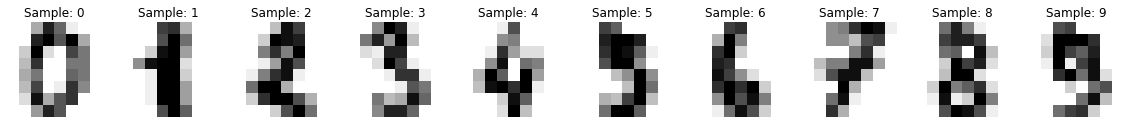

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(20, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Sample: %i' % label)

Мы реализовали только линейный слой, а он не может принимать на вход двумерные изображения.

Но есть выход, давайте разложим двумерную матрицу изображения в одномерный вектор, для этого воспользуемся функцией reshape, вам нужно только выбрать правильный размер.

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((# место для вашего кода)) 

# эта функция поможет разбить наш датасет на обучающую и тестовые выборки случайным образом
# data/16 — это нормализация

X_train, X_test, y_train, y_test = train_test_split(
    data/16, digits.target, test_size=0.3, shuffle=False)

print(X_train.shape, y_train.reshape(-1, 1).shape)
#(1257, 64) (1257, 1)

Выберите структуру сети сами. Важно указать правильно входной и выходные размеры — размер вектора картинки и количество различных цифр в нашем датасете.

Также предлагаем вам подобрать количество итераций и learning rate.

In [ ]:
structure = [[# место для вашего кода]]

iter_num = # место для вашего кода

lr = # место для вашего кода

N = MultiClassNN(structure, CE_loss, CE_and_softmax_loss_derivative)

avg_cost_func = N.train(X_train, y_train.reshape(-1, 1), iter_num, lr)

sns.lineplot(data=avg_cost_func)

Проверим на каком-нибудь примере, как всё работает.

In [ ]:
predictions = N.apply(X_train[1])
print(predictions, y_train[1])

Теперь посчитаем точность вашей сети:

In [ ]:
def estimate_accuracy(predictions, targets):
    sum = 0
    for i in range(len(predictions)):
        if predictions[i] == targets[i]:
            sum += 1
    return sum/len(predictions)
        

In [ ]:
train_preds = np.array([N.apply(x).argmax() for x in X_train])
print("train accuracy = {}".format(estimate_accuracy(our_preds, y_train)))

test_preds = np.array([N.apply(x).argmax() for x in X_test])
print("test accuracy = {}".format(estimate_accuracy(test_preds, y_test)))

Задание считается выполненным, если test_accuracy >= 0.8.